Department of Computer Engineering
University of Peradeniya
Machine Learning Lab Two

Rajakaruna M.M.P.N.

E/19/306

Objective

Implementing a linear classifier using the Perceptron algorithm.

(-7.0, 12.0)

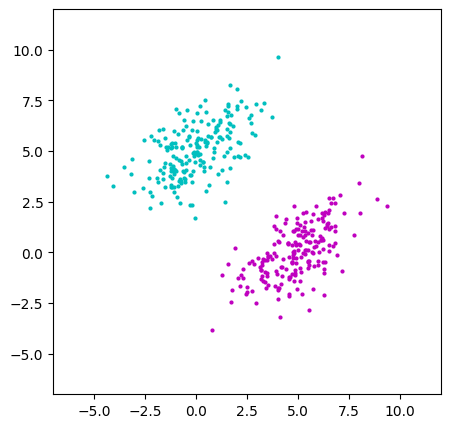

In [88]:
import matplotlib.pyplot as plt
import numpy as np

NumDataPerClass = 200

# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 5]]
m2 = [[5, 0]]
C = [[2, 1], [1, 2]]

# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C) 

U1 = np.random.randn(NumDataPerClass, 2) 
X1 = U1 @ A.T + m1                        # lower triangular matrix A is used to transform vectors of uncorrelated random numbers into correlated ones

U2 = np.random.randn(NumDataPerClass, 2)   #generate random samples from a uniform distribution (np.random.rand) and 
                                          #transform them into samples from a Gaussian distribution with the specified mean (m1, m2) and covariance matrix (C).
X2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.set_xlim(-7, 12)
ax.set_ylim(-7, 12)




The *covariance* matrix plays a crucial role in defining the spread and orientation of the data points in multivariate statistics. In this context, for a two-dimensional dataset like the one in the provided code, the covariance matrix describes how the two variables (features) are related to each other.

The *Cholesky decomposition* is a method used to decompose a positive definite matrix (like a covariance matrix) into a lower triangular matrix multiplied by its transpose.
 In the context of generating data from a multivariate Gaussian distribution, the Cholesky decomposition helps us transform uncorrelated variables (which are easily generated using, for example, independent random numbers) into correlated ones. By multiplying a vector of uncorrelated random numbers by the lower triangular matrix A, we can obtain a vector of correlated random numbers

In [90]:
# Concatenate data from two classes into one array.
X = np.concatenate((X1, X2), axis=0)  # (axis=0), meaning it appends the rows of X2 below the rows of X1

# Setting up targets (labels): we set +1 and −1 as labels to indicate the two classes.
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate( (labelPos, labelNeg))

# Partitioning the data into training and test sets
# 
rIndex = np.random.permutation(2*NumDataPerClass)  # randomly shuffles the indices from 0 to 2*NumDataPerClass - 1
Xr = X[rIndex] 
yr = y[rIndex]

# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Ntrain = NumDataPerClass
Ntest = NumDataPerClass


(200, 2) (200,) (200, 2) (200,)


In [91]:
#  Calculating the percentage of correctly classified examples
# 
def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n]*np.dot(OneInput, weights) > 0):
            nCorrect += 1 
    return 100*nCorrect/N 


Here's how the labeling works in practice:

For Class A: We assign a label of +1 to all data points belonging to Class A.
For Class B: We assign a label of -1 to all data points belonging to Class B.
Now, regarding the condition if (targets[n]*np.dot(OneInput, weights) > 0):, let's break it down:

targets[n]: This represents the target label for the nth data point. In our binary classification setup, targets[n] can be either +1 or -1, depending on the class to which the nth data point belongs.
np.dot(OneInput, weights): This computes the dot product between the input features of the nth data point (OneInput) and the weights of the perceptron (weights). The dot product essentially represents the weighted sum of the input features, which is used to make predictions.
Now, let's consider two scenarios:

If targets[n] is +1:

If np.dot(OneInput, weights) is positive, it means that the weighted sum of the input features is positive.
This indicates that the perceptron predicts Class A (+1) for the nth data point.
Since the actual label (targets[n]) is also +1, and the prediction (np.dot(OneInput, weights)) is positive, it means the data point is correctly classified.
If targets[n] is -1:

If np.dot(OneInput, weights) is negative, it means that the weighted sum of the input features is negative.
This indicates that the perceptron predicts Class B (-1) for the nth data point.
Since the actual label (targets[n]) is also -1, and the prediction (np.dot(OneInput, weights)) is negative, it means the data point is correctly classified.

In [96]:
# Iterative error correcting learning
# 

# Perceptron learning loop
# Random initialization of weights
w = np.random.randn(2)
print(w)

# What is the performance with the initial random weights?
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))

# Fixed number of iterations (think of better stopping criterion)
MaxIter=1000
# Learning rate (change this to see convergence changing)
alpha = 0.002

# Space to save answers for plotting
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

# Main Loop
for iter in range(MaxIter):
    # Select a data item at random
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]
    
    # If it is misclassified, update weights
    if (y_train[r] * np.dot(x, w) < 0):
       w += alpha * y_train[r] * x
    # Evaluate trainign and test performances for plotting
    P_train[iter] = PercentCorrect(X_train, y_train, w)
    P_test[iter] = PercentCorrect(X_test, y_test, w)
print('Percentage Correct After Training: %6.2f %6.2f'%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))
print(w)
    



[ 0.71681451 -0.03265685]
Initial Percentage Correct:  21.00
Percentage Correct After Training: 100.00 100.00
[-0.07661672  0.11050683]


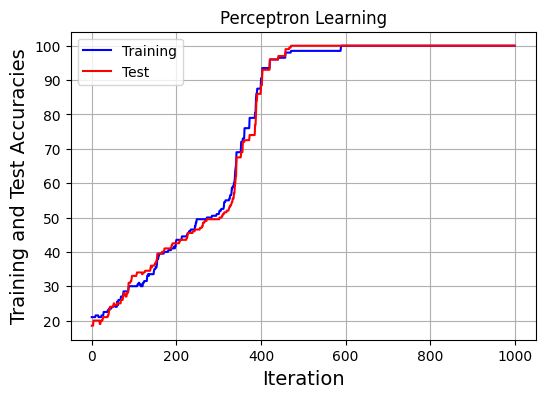

In [62]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test,'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')

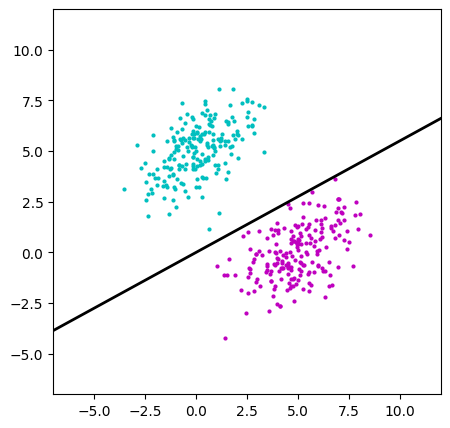

In [63]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.set_xlim(-7, 12)
ax.set_ylim(-7, 12)

# Plotting the linear classification boundary
x_values = np.linspace(-7, 12, 100)
y_values = -(w[0] / w[1])*x_values
plt.plot(x_values, y_values, color='black', linestyle='-', linewidth=2)


Scikitlearn Package

In [64]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

model = Perceptron()
model.fit(X_train, y_train)
yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" %(accuracy_score(yh_train, y_train)))

yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" %(accuracy_score(yh_test, y_test)))

if (accuracy_score(yh_test, y_test) > 0.99):
  print("Wow, Perfect Classification on Separable dataset!")

Accuracy on training set:   1.00
Accuracy on test set:   1.00
Wow, Perfect Classification on Separable dataset!


Accuracy on training set: 100.0
Accuracy on test set: 99.5


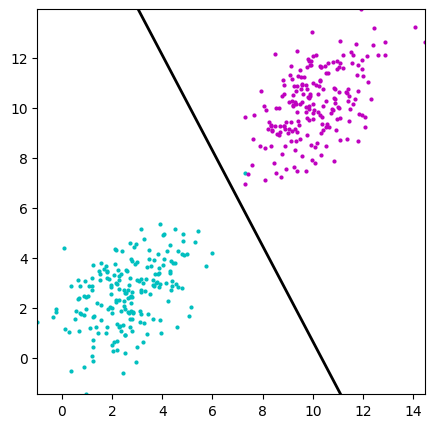

In [85]:
import matplotlib.pyplot as plt
import numpy as np

NumDataPerClass = 200

# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[2.5, 2.5]]
m2 = [[10.0, 10.0]]
C = [[2, 1], [1, 2]]

# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C) 

U1 = np.random.randn(NumDataPerClass, 2) 
X1 = U1 @ A.T + m1                        # lower triangular matrix A is used to transform vectors of uncorrelated random numbers into correlated ones

U2 = np.random.randn(NumDataPerClass, 2)   #generate random samples from a uniform distribution (np.random.rand) and 
                                          #transform them into samples from a Gaussian distribution with the specified mean (m1, m2) and covariance matrix (C).
X2 = U2 @ A.T + m2


# Concatenate data from two classes into one array.
X = np.concatenate((X1, X2), axis=0)

# Adding bias term
O = np.ones((2*NumDataPerClass, 1))
X = np.append(X, O, axis=1)

# Setting up targets (labels)
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))

# Partitioning the data into training and test sets
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex]
yr = y[rIndex]

# Training and test sets (half half)
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]

# Initialize weights with bias term
w = np.random.randn(X_train.shape[1])

# Perceptron learning loop
MaxIter = 10000
alpha = 0.002
for iter in range(MaxIter):
    r = np.floor(np.random.rand() * NumDataPerClass).astype(int)
    x = X_train[r, :]
    if (y_train[r] * np.dot(x, w) <= 0):
        w += alpha * y_train[r] * x

# Calculate accuracy on the training and test sets
def PercentCorrect(inputs, targets, weights):
    predictions = np.dot(inputs, weights)
    predictions[predictions > 0] = 1
    predictions[predictions <= 0] = -1
    accuracy = np.mean(predictions == targets) * 100
    return accuracy

train_accuracy = PercentCorrect(X_train, y_train, w)
test_accuracy = PercentCorrect(X_test, y_test, w)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.set_xlim(-7, 12)
ax.set_ylim(-7, 12)

# Plot linear classifier
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values = -(w[0] * x_values + w[2]) / w[1]
plt.plot(x_values, y_values, color='black', linestyle='-', linewidth=2, label='Decision Boundary')

plt.xlim(np.min(X[:, 0]), np.max(X[:, 0]))
plt.ylim(np.min(X[:, 1]), np.max(X[:, 1]))
plt.show()
